### **Mount Google Drive/Parent Directory**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### **Install and Import Libraries**

In [ ]:
import random
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.functional import Tensor
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.transforms.functional as TF
from torch.utils.data import Dataset, DataLoader
from torch.nn.modules.activation import ReLU
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
from scipy.ndimage.filters import median_filter
from skimage.morphology import disk
import seaborn as sns
import pickle
from torch.nn.modules.batchnorm import BatchNorm2d
import torch.optim as optim
from tqdm import tqdm
from google.colab import drive


import os
import cv2
import copy
import pandas as pd
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
from google.colab.patches import cv2_imshow
from sklearn.metrics import jaccard_score
import random
import torch
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from scipy.cluster.vq import vq
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.functional import Tensor
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from scipy.stats import kurtosis, skew
import torchvision.transforms.functional as TF
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from torch.utils.data import Dataset, DataLoader
from torch.nn.modules.activation import ReLU
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import kurtosis, skew
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
import pickle
from torch.nn.modules.batchnorm import BatchNorm2d
import torch.optim as optim
from tqdm import tqdm
from google.colab import drive
from pathlib import Path
from sklearn.utils import shuffle

### **Dataset Loading**

In [ ]:
# ############ Working With Smaller Datset ############
# ###################### RUN ONCE #########################
# ## Collecting the path and labels from the dataset
# train_nevus= sorted(glob(os.path.join(train_directory, "nevus", "*.jpg")))
# train_others= sorted(glob(os.path.join(train_directory, "others","*.jpg")))
# tags_nevus_train = []
# tags_others_train = []
# tags_train = []
# labels_nevus = []
# labels_others = []
# labels_train = []
# routes_train = []
# for i in range(len(train_nevus)):
#   tags_nevus_train.append(train_nevus[i][-12:])
#   labels_nevus.append(0)
# for i in range(len(train_others)):
#   tags_others_train.append(train_others[i][-12:])
#   labels_others.append(1)

# ## Combining the tags and labels from all the classes
# tags_train = tags_nevus_train[1:1500] + tags_others_train[1:1500]
# labels_train= labels_nevus[1:1500] + labels_others[1:1500]
# routes_train = train_nevus[1:1500] + train_others[1:1500]

# ## Writing to CSV File
# training_set = pd.DataFrame.from_dict({'Image Tag':tags_train, 'Label': labels_train, 'Image Route': routes_train})
# training_set = training_set.sample(frac=1,random_state=42).reset_index(drop=True)
# training_set.to_csv(input_directory+'/training_set3000.csv')

In [ ]:
def dataExtraction(directory, vocab):

  scc_aug= sorted(glob(os.path.join(directory, "scc", "*.jpg")))
  mel_aug = sorted(glob(os.path.join(directory, "mel", "*.jpg")))
  bcc_aug = sorted(glob(os.path.join(directory, "bcc", "*.jpg")))

  scc = []
  bcc = []
  mel = []

  for bcc_data in bcc_aug:
    if 'aug' not in bcc_data:
      bcc.append(bcc_data)
  for mel_data in mel_aug:
    if 'aug' not in mel_data:
      mel.append(mel_data)
  for scc_data in scc_aug:
    if 'aug' not in scc_data:
      scc.append(scc_data)

  if(vocab==True):
    scc = scc[0:100]
    mel = mel[0:100]
    bcc = bcc[0:100]
  tags_scc = []
  tags_mel = []
  tags_bcc = []
  tags_total = []
  labels_scc = []
  labels_mel = []
  labels_bcc = []
  labels_total = []
  routes_total = []
  for i in range(len(mel)):
    tags_mel.append(mel[i][-12:])
    labels_mel.append(0)
  for i in range(len(bcc)):
    tags_bcc.append(bcc[i][-12:])
    labels_bcc.append(1)
  for i in range(len(scc)):
    tags_scc.append(scc[i][-12:])
    labels_scc.append(2)
  ## Combining the tags and labels from all the classes
  tags_total = tags_scc + tags_mel + tags_bcc
  labels_total= labels_scc + labels_mel + labels_bcc
  routes_total = scc + mel + bcc

  return tags_total, labels_total, routes_total

In [ ]:
# Directories
input_directory = '/content/drive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem'
train_directory = input_directory+'/train' 
val_directory = input_directory+'/val'

**Training Dataset**

In [ ]:
## Writing to CSV File
tags_train, labels_train, routes_train = dataExtraction(train_directory, vocab=False)
training_set= pd.DataFrame.from_dict({'Image Tag':tags_train, 'Label': labels_train, 'Image Route': routes_train})
training_set= training_set.sample(frac=1,random_state=42).reset_index(drop=True)
training_set.to_csv(input_directory+'/Data/training_set.csv')

In [ ]:
## Writing to CSV File For Vocabulary
vocab_tags_train, vocab_labels_train, vocab_routes_train = dataExtraction(train_directory, vocab=True)
vocab_training_set= pd.DataFrame.from_dict({'Image Tag':vocab_tags_train, 'Label': vocab_labels_train, 'Image Route': vocab_routes_train})
vocab_training_set= vocab_training_set.sample(frac=1,random_state=42).reset_index(drop=True)
vocab_training_set.to_csv(input_directory+'/Data/vocab_training_set.csv')

**Validation Set**

In [ ]:
## Writing to CSV File
tags_val, labels_val, routes_val = dataExtraction(val_directory, vocab=False)
validation_set= pd.DataFrame.from_dict({'Image Tag':tags_val, 'Label': labels_val, 'Image Route': routes_val})
validation_set= validation_set.sample(frac=1,random_state=42).reset_index(drop=True)
validation_set.to_csv(input_directory+'/Data/validation_set.csv')

In [ ]:
## Checking
print(len(training_set))
print(len(validation_set))
print(len(vocab_training_set))

5082
1270
300


### **Vocabulary Building : SIFT/BoW**

In [ ]:
training_csv_path = input_directory + '/Data/training_set.csv'
validation_csv_path =  input_directory + '/Data/validation_set.csv'
vocab_csv_path = input_directory + '/Data/vocab_training_set.csv'
training_dataframe = pd.read_csv(training_csv_path)
validation_dataframe = pd.read_csv(validation_csv_path)
vocab_dataframe = pd.read_csv(vocab_csv_path)
training_images_routes= training_dataframe['Image Route'].to_numpy()
validation_images_routes= validation_dataframe['Image Route'].to_numpy()
vocab_images_routes= vocab_dataframe['Image Route'].to_numpy()

In [ ]:
## Test Purpose
print(len(training_images_routes))
print(len(validation_images_routes))
print(len(vocab_images_routes))

5082
1270
300


**Getting the Descriptors**

In [ ]:
def FeatureExtractionSIFT(image_routes):
  descriptors_list = []
  for i in image_routes:
    #input image
    image_read = cv2.imread(i)
    dim = (512, 512)
    # resize image
    image_resized =  cv2.resize(image_read, dim, interpolation = cv2.INTER_AREA)
    # cv2_imshow(image_resized)
    image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    # cv2_imshow(image_gray)


    # Dense Keypoints Extraction
    sift = cv2.xfeatures2d.SIFT_create()
    step_size = 20
    keypoints = [cv2.KeyPoint(x, y, step_size) for y in range(0, image_gray.shape[0], step_size) for x in range(0, image_gray.shape[1], step_size) if (x>128 and x<384) and (y>128 and y<384)]
    dense_descriptors = sift.compute(image_gray, keypoints)

    # if dense_descriptors[1] is not None:
    #   descriptors_list.append(dense_descriptors[1])
    # else:
    #     keypoints, sparse_descriptors = sift.detectAndCompute(image_gray, None)
    #     if sparse_descriptors is not None:
    #       descriptors_list.append(sparse_descriptors)
    #     else:
    #       step_size = 40
    #       keypoints = [cv2.KeyPoint(x, y, step_size) for y in range(0, image_gray.shape[0], step_size) for x in range(0, image_gray.shape[1], step_size)]
    #       random_descriptors = sift.compute(image_gray, keypoints)
    #       descriptors_list.append(random_descriptors[1])


    descriptors_list.append(dense_descriptors[1])
    # draw the detected key points
    # sift_image = cv2.drawKeypoints(image_resized, keypoints, image_resized)
    # show the image
    # cv2_imshow(sift_image)
  return descriptors_list

### **Vocabulary Creation**

In [ ]:
### Training Set SIFT Descriptors
vocab_sift_descriptors_list = FeatureExtractionSIFT(vocab_images_routes)
vocab_all_sift_descriptors = np.concatenate(vocab_sift_descriptors_list, axis=0)
print('descriptors.shape: {}'.format(vocab_all_sift_descriptors.shape))

descriptors.shape: (50700, 128)


In [ ]:
vocab_sift_descriptors_route = input_directory + '/Data/Pickles/smote_vocab_sift_descriptors_wp.p'
with open(vocab_sift_descriptors_route, 'wb') as fp:
  pickle.dump(vocab_all_sift_descriptors, fp)

In [ ]:
vocab_sift_descriptors_route = input_directory + '/Data/Pickles/smote_vocab_sift_descriptors_wp.p'
with open(vocab_sift_descriptors_route, 'rb') as fp:
  vocab_all_sift_descriptors = pickle.load(fp)

### **K-Means Clustering for BoW**

In [ ]:
## Computing Bag Of Words With K-means Clustering
num_clusters = 200
kmeans = KMeans(n_clusters=num_clusters, random_state=41)
kmeans.fit(vocab_all_sift_descriptors)
# print(kmeans.labels_)
# print(kmeans.cluster_centers_)
print('sse is {}'.format(kmeans.inertia_))
clusters = kmeans.cluster_centers_

sse is 2190276096.0


In [ ]:
clusters_route = input_directory + '/Data/Pickles/smote_clusters_wp.p'
with open(clusters_route, 'wb') as fp:
  pickle.dump(clusters, fp)

In [ ]:
clusters_route = input_directory + '/Data/Pickles/smote_clusters_wp.p'
with open(clusters_route, 'rb') as fp:
  clusters = pickle.load(fp)

### **Training Set Feature Extraction**

In [ ]:
### Training Set SIFT Descriptors
training_sift_descriptors_list = FeatureExtractionSIFT(training_images_routes)
training_all_sift_descriptors = np.concatenate(training_sift_descriptors_list, axis=0)
print('descriptors.shape: {}'.format(training_all_sift_descriptors.shape))

descriptors.shape: (858858, 128)


In [ ]:
training_sift_descriptors_route = input_directory + '/Data/Pickles/smote_training_sift_descriptors_wp.p'
with open(training_sift_descriptors_route, 'wb') as fp:
  pickle.dump(training_all_sift_descriptors, fp)

In [ ]:
training_sift_descriptors_route = input_directory + '/Data/Pickles/smote_training_sift_descriptors_wp.p'
with open(training_sift_descriptors_route, 'rb') as fp:
  training_all_sift_descriptors = pickle.load(fp)

### **Validation Set Feature Extraction**

In [ ]:
### Training Set SIFT Descriptors
validation_sift_descriptors_list = FeatureExtractionSIFT(validation_images_routes)
validation_all_sift_descriptors = np.concatenate(validation_sift_descriptors_list, axis=0)
print('descriptors.shape: {}'.format(validation_all_sift_descriptors.shape))

descriptors.shape: (214630, 128)


In [ ]:
validation_sift_descriptors_route = input_directory + '/Data/Pickles/smote_validation_sift_descriptors_wp.p'
with open(validation_sift_descriptors_route, 'wb') as fp:
  pickle.dump(validation_all_sift_descriptors, fp)

In [ ]:
validation_sift_descriptors_route = input_directory + '/Data/Pickles/smote_validation_sift_descriptors_wp.p'
with open(validation_sift_descriptors_route, 'rb') as fp:
  validation_all_sift_descriptors = pickle.load(fp)

### **Merge and Check**

In [ ]:
training_sift_descriptors_list = np.reshape(training_all_sift_descriptors, (len(training_images_routes),169,128))
print(training_sift_descriptors_list.shape)
validation_sift_descriptors_list = np.reshape(validation_all_sift_descriptors, (len(validation_images_routes),169,128))
print(validation_sift_descriptors_list.shape)

(5082, 169, 128)
(1270, 169, 128)


### **Feature Histogram Computation**

In [ ]:
def featureHistogram(descriptor_list, clusters):
  code, _ = vq(descriptor_list, clusters)
  features = np.zeros((1, clusters.shape[0]))
  for x in code:
    features[0, x] += 1
  return features

**Training Set**

In [ ]:
train_features_list = []
for i in range(len(training_images_routes)):
  per_train_features_list = featureHistogram(training_sift_descriptors_list[i], clusters)
  train_features_list.append(per_train_features_list)
train_features = np.concatenate(train_features_list, axis=0)
print('features all shape is: {}'.format(train_features.shape))


features all shape is: (5082, 200)


In [ ]:
train_features_all_route = input_directory + '/Data/Pickles/smote_train_features_wp.p'
with open(train_features_all_route, 'wb') as fp:
  pickle.dump(train_features, fp)

In [ ]:
train_features_all_route = input_directory + '/Data/Pickles/smote_train_features_wp.p'
with open(train_features_all_route, 'rb') as fp:
  train_features = pickle.load(fp)

In [ ]:
tdf = pd.DataFrame(train_features)
tdf = tdf/169
tdf

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.000000,0.005917,0.005917,0.000000,0.017751,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005917,0.023669,0.0,0.0,0.000000,0.071006,0.000000,0.000000,0.005917
1,0.000000,0.000000,0.000000,0.000000,0.029586,0.000000,0.000000,0.023669,0.000000,0.000000,...,0.000000,0.000000,0.011834,0.0,0.0,0.017751,0.000000,0.000000,0.000000,0.011834
2,0.005917,0.000000,0.000000,0.000000,0.000000,0.047337,0.005917,0.000000,0.112426,0.000000,...,0.000000,0.000000,0.005917,0.0,0.0,0.000000,0.000000,0.000000,0.005917,0.000000
3,0.000000,0.000000,0.005917,0.000000,0.011834,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.029586,0.011834,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.011834
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005917,0.000000,0.000000,...,0.000000,0.000000,0.035503,0.0,0.0,0.000000,0.005917,0.000000,0.000000,0.023669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5077,0.000000,0.000000,0.000000,0.000000,0.023669,0.000000,0.000000,0.023669,0.000000,0.000000,...,0.000000,0.000000,0.011834,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.011834
5078,0.000000,0.059172,0.000000,0.035503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.035503,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023669,0.000000,0.000000,0.029586,...,0.023669,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.017751,0.000000,0.000000
5080,0.000000,0.011834,0.005917,0.000000,0.035503,0.000000,0.000000,0.005917,0.000000,0.000000,...,0.000000,0.000000,0.035503,0.0,0.0,0.017751,0.011834,0.000000,0.000000,0.011834


**Validation Set**

In [ ]:
validation_features_list = []
for i in range(len(validation_images_routes)):
  per_val_features_list = featureHistogram(validation_sift_descriptors_list[i], clusters)
  validation_features_list.append(per_val_features_list)
val_features = np.concatenate(validation_features_list, axis=0)
print('features all shape is: {}'.format(val_features.shape))

features all shape is: (1270, 200)


In [ ]:
val_features_all_route = input_directory + '/Data/Pickles/smote_val_features_wp.p'
with open(val_features_all_route, 'wb') as fp:
  pickle.dump(val_features, fp)

In [ ]:
val_features_all_route = input_directory + '/Data/Pickles/smote_val_features_wp.p'
with open(val_features_all_route, 'rb') as fp:
  val_features = pickle.load(fp)

In [ ]:
vdf = pd.DataFrame(val_features)
vdf = vdf/169
vdf

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.005917,0.000000,0.000000,0.000000,0.000000,0.023669,0.011834,0.000000,0.017751,...,0.011834,0.000000,0.005917,0.000000,0.000000,0.000000,0.011834,0.0,0.000000,0.000000
1,0.000000,0.011834,0.005917,0.029586,0.005917,0.000000,0.000000,0.011834,0.000000,0.000000,...,0.000000,0.029586,0.000000,0.000000,0.000000,0.017751,0.059172,0.0,0.000000,0.000000
2,0.000000,0.000000,0.005917,0.000000,0.000000,0.000000,0.000000,0.047337,0.000000,0.000000,...,0.000000,0.000000,0.017751,0.000000,0.000000,0.000000,0.029586,0.0,0.000000,0.011834
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.011834,0.000000,0.023669,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.011834,0.000000,0.011834,0.000000,0.0,0.017751,0.005917
4,0.005917,0.000000,0.023669,0.017751,0.011834,0.000000,0.000000,0.011834,0.000000,0.000000,...,0.000000,0.005917,0.011834,0.000000,0.000000,0.035503,0.017751,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,0.000000,0.000000,0.000000,0.000000,0.023669,0.000000,0.000000,0.017751,0.035503,0.000000,...,0.000000,0.000000,0.017751,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.017751
1266,0.005917,0.000000,0.000000,0.000000,0.017751,0.000000,0.000000,0.011834,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.011834,0.011834,0.000000,0.000000,0.0,0.011834,0.000000
1267,0.017751,0.000000,0.000000,0.000000,0.000000,0.017751,0.000000,0.076923,0.000000,0.000000,...,0.000000,0.017751,0.011834,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1268,0.000000,0.000000,0.000000,0.000000,0.017751,0.005917,0.000000,0.029586,0.000000,0.000000,...,0.000000,0.029586,0.017751,0.000000,0.000000,0.000000,0.029586,0.0,0.000000,0.011834


### **Training**

In [ ]:
X_train_features = train_features
y_train = training_set['Label'].to_numpy()
X_test_features = val_features
y_test = validation_set['Label'].to_numpy()
scaler= StandardScaler().fit(X_train_features)
X_train_scaled= scaler.transform(X_train_features)
X_test_scaled= scaler.transform(X_test_features)

In [ ]:
#Data Balancing in order to tackle data imbalance. technique used: SMOTE 
from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler
ros = SMOTE(sampling_strategy='auto', random_state= 42)
X_train_resampled, y_train_resampled= ros.fit_resample(X_train_scaled,y_train)
print(np.bincount(y_train_resampled))

[2713 2713 2713]


First model: SVM

In [ ]:
model1= svm.SVC()
model1.fit(X_train_resampled, y_train_resampled)
y_pred1= model1.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred1))
print(balanced_accuracy_score(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       678
           1       0.67      0.70      0.68       498
           2       0.37      0.31      0.34        94

    accuracy                           0.70      1270
   macro avg       0.60      0.59      0.59      1270
weighted avg       0.70      0.70      0.70      1270

0.5892782200161973


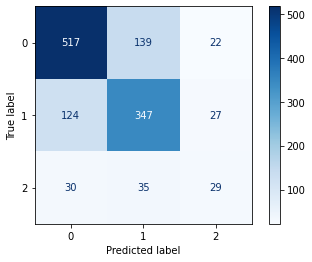

In [ ]:
cm= confusion_matrix(y_test,y_pred1,labels= model1.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Second Model: Logistic Regression

In [ ]:
model2= LogisticRegression(max_iter=2000)
model2.fit(X_train_resampled, y_train_resampled)
y_pred2= model2.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred2))
print(balanced_accuracy_score(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.75      0.59      0.66       678
           1       0.60      0.53      0.56       498
           2       0.14      0.44      0.21        94

    accuracy                           0.55      1270
   macro avg       0.50      0.52      0.48      1270
weighted avg       0.65      0.55      0.59      1270

0.5177704478870733


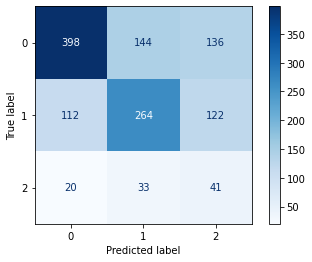

In [ ]:
cm= confusion_matrix(y_test,y_pred2,labels= model2.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Third model: Gradient Boosting

In [ ]:
model3= GradientBoostingClassifier(random_state=42)
model3.fit(X_train_resampled, y_train_resampled)
y_pred3= model3.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred3))
print(balanced_accuracy_score(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       678
           1       0.61      0.65      0.63       498
           2       0.14      0.05      0.08        94

    accuracy                           0.66      1270
   macro avg       0.49      0.48      0.48      1270
weighted avg       0.63      0.66      0.64      1270

0.4817162329100497


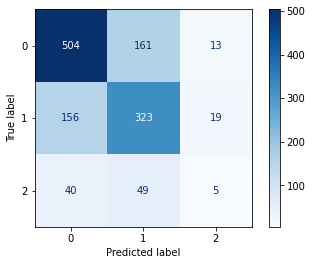

In [ ]:
cm= confusion_matrix(y_test,y_pred3,labels= model3.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Fourth Model: Random Forest Classifier

In [ ]:
model4= RandomForestClassifier(random_state=42)
model4.fit(X_train_resampled, y_train_resampled)
y_pred4= model4.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred4))
print(balanced_accuracy_score(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       678
           1       0.64      0.68      0.66       498
           2       0.31      0.10      0.15        94

    accuracy                           0.69      1270
   macro avg       0.56      0.52      0.52      1270
weighted avg       0.67      0.69      0.67      1270

0.5169346185343898


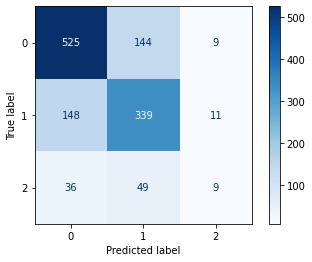

In [ ]:
cm= confusion_matrix(y_test,y_pred4,labels= model4.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model4.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Fifth model: AdaBoost classifier

In [ ]:
model5= AdaBoostClassifier(random_state=42)
model5.fit(X_train_resampled, y_train_resampled)
y_pred5= model5.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred5))
print(balanced_accuracy_score(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       678
           1       0.55      0.56      0.56       498
           2       0.11      0.14      0.12        94

    accuracy                           0.59      1270
   macro avg       0.46      0.46      0.46      1270
weighted avg       0.60      0.59      0.60      1270

0.4583737573780971


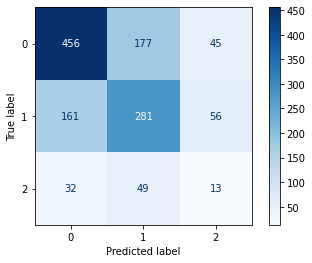

In [ ]:
cm= confusion_matrix(y_test,y_pred5,labels= model5.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model5.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Sixth Model: Decision Trees Classifier

In [ ]:
model6= DecisionTreeClassifier(random_state=42)
model6.fit(X_train_resampled, y_train_resampled)
y_pred6= model6.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred6))
print(balanced_accuracy_score(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       678
           1       0.52      0.51      0.52       498
           2       0.19      0.30      0.23        94

    accuracy                           0.55      1270
   macro avg       0.46      0.47      0.46      1270
weighted avg       0.57      0.55      0.56      1270

0.4749882603280757


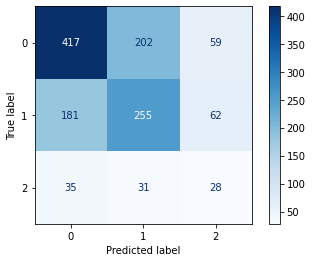

In [ ]:
cm= confusion_matrix(y_test,y_pred6,labels= model6.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model6.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Seventh model: XGBoost Classifier

In [ ]:
model7= XGBClassifier(random_state=42)
model7.fit(X_train_resampled, y_train_resampled)
y_pred7= model7.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred7))
print(balanced_accuracy_score(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       678
           1       0.60      0.64      0.62       498
           2       0.23      0.11      0.15        94

    accuracy                           0.65      1270
   macro avg       0.52      0.49      0.50      1270
weighted avg       0.63      0.65      0.64      1270

0.4938195006852238


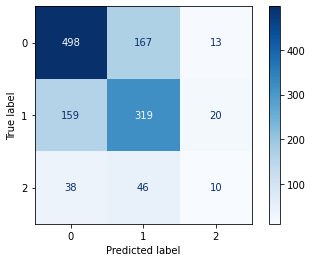

In [ ]:
cm= confusion_matrix(y_test,y_pred7,labels= model7.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model7.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Eigth model: Naive Bayes Classifier

In [ ]:
model8= GaussianNB()
model8.fit(X_train_resampled, y_train_resampled)
y_pred8= model8.predict(X_test_scaled)


In [ ]:
print(classification_report(y_test,y_pred8))
print(balanced_accuracy_score(y_test,y_pred8))

              precision    recall  f1-score   support

           0       0.74      0.54      0.62       678
           1       0.54      0.37      0.44       498
           2       0.13      0.59      0.21        94

    accuracy                           0.48      1270
   macro avg       0.47      0.50      0.42      1270
weighted avg       0.61      0.48      0.52      1270

0.4992967539523563


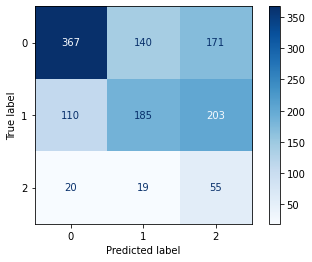

In [ ]:
cm= confusion_matrix(y_test,y_pred8,labels= model8.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model8.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Ninth Model: KNeighbors Classifier

In [ ]:
model9= KNeighborsClassifier()
model9.fit(X_train_resampled, y_train_resampled)
y_pred9= model9.predict(X_test_scaled)


In [ ]:
print(classification_report(y_test,y_pred9))
print(balanced_accuracy_score(y_test,y_pred9))

              precision    recall  f1-score   support

           0       0.85      0.47      0.60       678
           1       0.64      0.56      0.60       498
           2       0.15      0.73      0.25        94

    accuracy                           0.53      1270
   macro avg       0.55      0.59      0.48      1270
weighted avg       0.71      0.53      0.58      1270

0.588617067907606


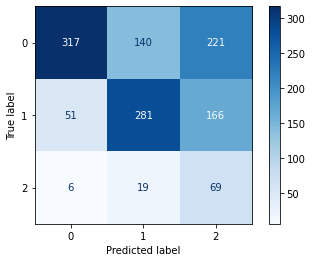

In [ ]:
cm= confusion_matrix(y_test,y_pred9,labels= model9.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model9.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Tenth Model: Bagging Classifier

In [ ]:
model10= BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),n_estimators=10,random_state=42)
model10.fit(X_train_resampled, y_train_resampled)
y_pred10= model10.predict(X_test_scaled)


In [ ]:
print(classification_report(y_test,y_pred10))
print(balanced_accuracy_score(y_test,y_pred10))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       678
           1       0.62      0.70      0.66       498
           2       0.31      0.12      0.17        94

    accuracy                           0.68      1270
   macro avg       0.56      0.52      0.53      1270
weighted avg       0.67      0.68      0.67      1270

0.5205734757267947


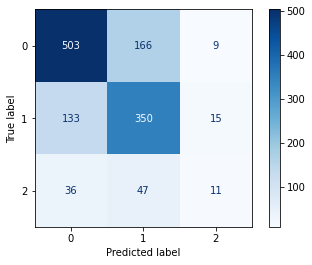

In [ ]:
cm= confusion_matrix(y_test,y_pred10,labels= model10.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model10.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Eleventh Model: Stacking Classifier

In [ ]:
def get_stack_model():
  level0 = list()
  level0.append(('lr', LogisticRegression(max_iter=2000,random_state=42)))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('cart', DecisionTreeClassifier(random_state=42)))
  level0.append(('svm', svm.SVC(kernel='rbf', gamma='auto',decision_function_shape='ovr', random_state=42)))
  level0.append(('bayes', GaussianNB()))
  level0.append(('gboosting', GradientBoostingClassifier(random_state=42)))
  level0.append(('rforest', RandomForestClassifier(random_state=42)))
  level0.append(('adaboost', AdaBoostClassifier(random_state=42)))
  level1 = LogisticRegression(max_iter=2000,random_state=42)
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

In [ ]:
model11=get_stack_model()
model11.fit(X_train_resampled, y_train_resampled)
y_pred11= model11.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred11))
print(balanced_accuracy_score(y_test,y_pred11))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78       678
           1       0.68      0.68      0.68       498
           2       0.67      0.23      0.35        94

    accuracy                           0.72      1270
   macro avg       0.70      0.58      0.60      1270
weighted avg       0.71      0.72      0.71      1270

0.5756389015548795


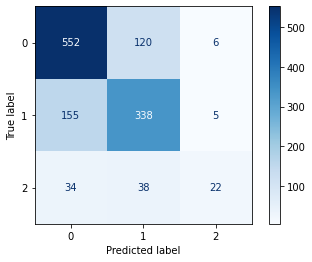

In [ ]:
cm= confusion_matrix(y_test,y_pred11,labels= model11.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model11.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()